In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from lofo import LOFOImportance, FLOFOImportance, Dataset, plot_importance
%matplotlib inline

In [7]:
df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df['family_size'] = df.SibSp + df.Parch + 1
df['is_alone'] = (df.family_size == 0)
df['has_cabin'] = df.Cabin.notnull()
    
    # Encoding Categorical Features
df.drop('Cabin', axis=1, inplace=True)
df.Sex = df.Sex.astype('category').cat.codes
df.Embarked = df.Embarked.astype('category').cat.codes
df.Name = df.Name.astype('category').cat.codes
    
    # Preprocessing Tickets
df.Ticket = df.Ticket.str.split(' ').str[-1]
    
    # Handling Missing values
df['Age_p'] = df.Age.isnull()
df.loc[df.Age.isnull(), 'Age'] = df.Age.mean()
df.Age = df.Age.astype('int')
    
    # Dropping records
df.drop(df.loc[df.Ticket == 'LINE'].index, axis=0, inplace=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,is_alone,has_cabin,Age_p
0,1,0,3,108,1,22,1,0,21171,7.2500,2,2,False,False,False
1,2,1,1,190,0,38,1,0,17599,71.2833,0,2,False,True,False
2,3,1,3,353,0,26,0,0,3101282,7.9250,2,1,False,False,False
3,4,1,1,272,0,35,1,0,113803,53.1000,2,2,False,True,False
4,5,0,3,15,1,35,0,0,373450,8.0500,2,1,False,False,False


In [10]:
rf= RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)

In [27]:
feature = [col for col in df.columns if col != 'Survived']
dataset = Dataset(df=df, target = 'Survived', features=feature)
cv = KFold(n_splits=4, shuffle=True, random_state=0)

In [28]:
fi = LOFOImportance(dataset, scoring="accuracy", model = rf, cv=cv)

In [29]:
imp = fi.get_importance()

In [30]:
imp

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
3,Sex,0.090223,0.028792,0.049550,0.076577,0.117117,0.117647
4,Age,0.019170,0.016050,0.018018,0.040541,-0.004505,0.022624
9,Embarked,0.013524,0.022745,-0.013514,0.049550,0.009009,0.009050
7,Ticket,0.006757,0.026362,0.000000,0.049550,-0.022523,0.000000
13,Age_p,0.003348,0.026180,-0.004505,0.045045,0.000000,-0.027149
5,SibSp,0.002262,0.018162,-0.027027,0.022523,0.004505,0.009050
2,Name,0.002237,0.027316,-0.013514,0.049550,-0.013514,-0.013575
12,has_cabin,0.001131,0.027285,0.004505,0.036036,-0.040541,0.004525
1,Pclass,-0.001136,0.024547,-0.022523,0.040541,-0.013514,-0.009050
0,PassengerId,-0.002242,0.017307,-0.027027,0.018018,-0.009009,0.009050


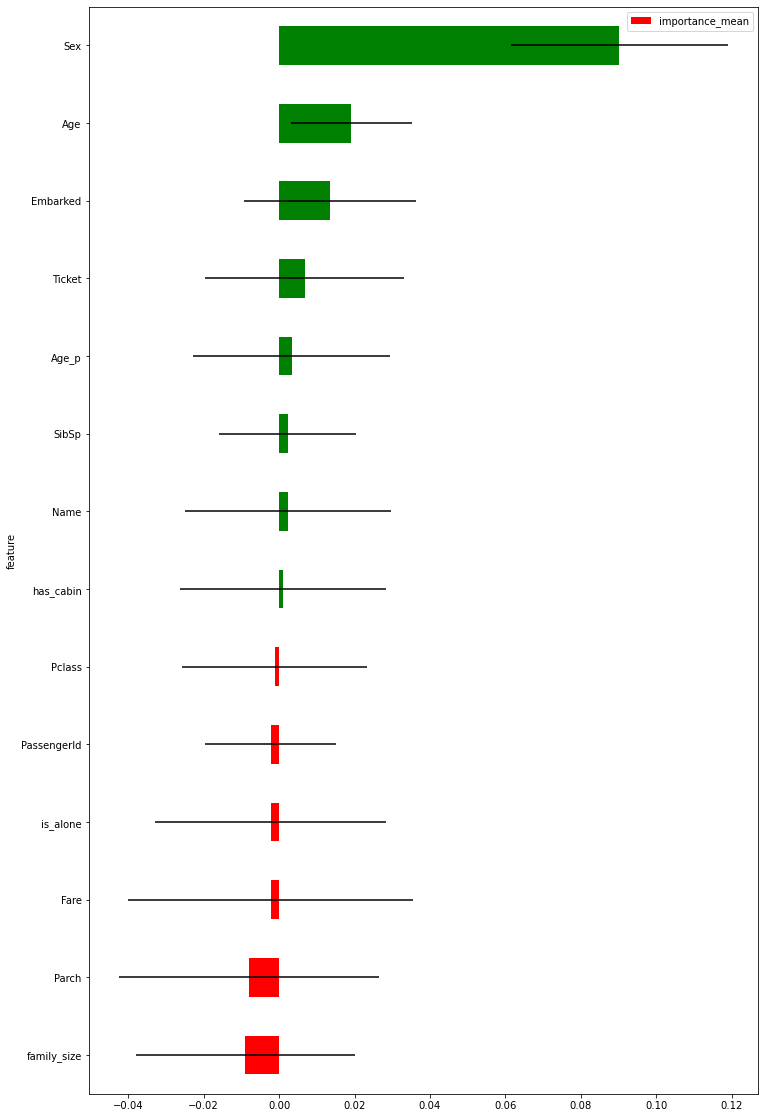

In [31]:
plot_importance(imp, figsize=(12, 20))

In [33]:
voice=pd.read_csv('data/voice.csv')
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [34]:
voice.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [37]:
voice.label = voice.label.astype('category').cat.codes

In [38]:
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [39]:
from sklearn.ensemble import RandomForestClassifier
from lofo import Dataset, lofo_importance, plot_importance

In [40]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)

In [41]:
feature = [col for col in voice.columns if col != 'label']
voice_dataset = Dataset(df=voice, target='label', features=feature)

In [42]:
f_imp = LOFOImportance(dataset=voice_dataset, model = rf, scoring="accuracy")

In [43]:
importance = f_imp.get_importance()

In [44]:
importance

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
12,meanfun,0.041035,0.010431,0.056818,0.041667,0.027778,0.037879
17,maxdom,0.002841,0.006080,-0.005051,0.000000,0.011364,0.005051
18,dfrange,0.001894,0.005956,-0.005051,0.000000,0.011364,0.001263
14,maxfun,0.001894,0.006591,-0.008838,0.005051,0.008838,0.002525
16,mindom,0.001578,0.005235,-0.006313,0.000000,0.006313,0.006313
19,modindx,0.001263,0.003093,-0.003788,0.003788,0.001263,0.003788
15,meandom,0.000631,0.004042,-0.005051,-0.001263,0.005051,0.003788
13,minfun,0.000631,0.008304,-0.012626,0.001263,0.010101,0.003788
5,IQR,-0.002210,0.014923,-0.026515,0.000000,0.013889,0.003788
1,sd,-0.005682,0.012160,-0.025253,-0.005051,0.007576,0.000000


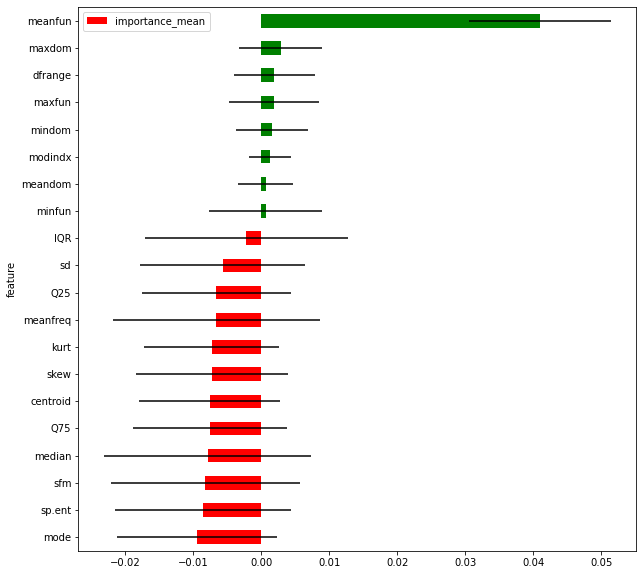

In [45]:
plot_importance(importance, figsize=(10,10))

In [48]:
to_keep = importance.feature[importance.importance_mean > 0]
to_keep

12    meanfun
17     maxdom
18    dfrange
14     maxfun
16     mindom
19    modindx
15    meandom
13     minfun
Name: feature, dtype: object

In [51]:
X = voice.drop('label', axis=1)[to_keep]
y = voice['label']

In [52]:
X,y

(       meanfun    maxdom   dfrange    maxfun    mindom   modindx   meandom  \
 0     0.084279  0.007812  0.000000  0.275862  0.007812  0.000000  0.007812   
 1     0.107937  0.054688  0.046875  0.250000  0.007812  0.052632  0.009014   
 2     0.098706  0.015625  0.007812  0.271186  0.007812  0.046512  0.007990   
 3     0.088965  0.562500  0.554688  0.250000  0.007812  0.247119  0.201497   
 4     0.106398  5.484375  5.476562  0.266667  0.007812  0.208274  0.712812   
 ...        ...       ...       ...       ...       ...       ...       ...   
 3163  0.182790  4.210938  4.203125  0.262295  0.007812  0.161929  0.832899   
 3164  0.188980  3.679688  3.640625  0.275862  0.039062  0.277897  0.909856   
 3165  0.209918  2.937500  2.929688  0.275862  0.007812  0.194759  0.494271   
 3166  0.172375  3.593750  3.585938  0.250000  0.007812  0.311002  0.791360   
 3167  0.185607  0.554688  0.546875  0.271186  0.007812  0.350000  0.227022   
 
         minfun  
 0     0.015702  
 1     0.01582

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0)

In [55]:
rf.score(X_test, y_test)

0.9589905362776026

In [63]:
#Random shuffling on Voice
results ={}
X = voice.drop('label', axis=1)
y = voice['label']
for name, col in X.items():
    temp_x_train = X.copy()
    temp_x_train[name] = np.random.permutation(col)
    rf.fit(X,y)
#     print(f'{name} shuffled: Train_score: {clf.score(temp_x_train, y_train):.3f}')
    results[name]= rf.score(temp_x_train, y)

In [64]:
results

{'meanfreq': 0.9801136363636364,
 'sd': 0.978219696969697,
 'median': 0.9794823232323232,
 'Q25': 0.9378156565656566,
 'Q75': 0.9791666666666666,
 'IQR': 0.9671717171717171,
 'skew': 0.9791666666666666,
 'kurt': 0.9791666666666666,
 'sp.ent': 0.9772727272727273,
 'sfm': 0.976010101010101,
 'mode': 0.97885101010101,
 'centroid': 0.97885101010101,
 'meanfun': 0.8020833333333334,
 'minfun': 0.9797979797979798,
 'maxfun': 0.9801136363636364,
 'meandom': 0.97885101010101,
 'mindom': 0.9797979797979798,
 'maxdom': 0.97885101010101,
 'dfrange': 0.9794823232323232,
 'modindx': 0.9794823232323232}